<a href="https://colab.research.google.com/github/denisgoritko/python-ecommerce-analysis/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework
countries = pd.read_csv("/content/drive/MyDrive/Mate_homework/countries.csv")
products = pd.read_csv("/content/drive/MyDrive/Mate_homework/products.csv")
events = pd.read_csv("/content/drive/MyDrive/Mate_homework/events.csv")



Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


# Data overview. Розуміння даних та їх змісту.
Завантаж датасет, розберись зі змістом колонок, зроби їх опис.
Вияви ключові поля, що поєднують три таблиці.
*   Таблиця  countries надає інформацію про країни та регіони, ключовим стовпцем є alpha-2, цей стовбець дає нам код країни
*   Таблиця products дає інформацію про товари, ключовим стовпцем є id
*   Таблиця events дає інформацію по продажі, ключовими стовпцями є order id, product id, country code


In [ ]:
# Ключові поля
#countries (країни): alpha-2
#products (товари): id
#events (продажі): Country Code, Product ID
countries.info()
products.info()
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      

# Data cleaning. Робота із пропущеними даними, некоректними даними, аномаліями.

In [ ]:
countries.isna().sum()/countries.shape[0] #Знаходимо відсоток пропущенних данних

,0
name,0.0
alpha-2,0.0
alpha-3,0.0
region,0.0
sub-region,0.0


In [ ]:
products.isna().sum()/products.shape[0] #Знаходимо відсоток пропущенних данних

,0
id,0.0
item_type,0.0


In [ ]:
events.isna().sum()/events.shape[0] #Знаходимо відсоток пропущенних данних

,0
Order ID,0.0
Order Date,0.0
Ship Date,0.0
Order Priority,0.0
Country Code,0.0
Product ID,0.0
Sales Channel,0.0
Units Sold,0.0
Unit Price,0.0
Unit Cost,0.0


In [ ]:

events['Country Code'] = events['Country Code'].fillna('Unknown') #Заміна пропущених категоріальних значень
events = events.dropna(subset=['Units Sold']) #Видалення пропущенних значень
countries = countries.dropna() #Видалення пропущенних значень
events["Order Date"]= pd.to_datetime(events["Order Date"]) #Змінюємо формат данних
events["Ship Date"]= pd.to_datetime(events["Ship Date"]) #Змінюємо формат данних

In [ ]:
#перевірка данних
countries.info()
products.info()
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        247 non-null    object
 1   alpha-2     247 non-null    object
 2   alpha-3     247 non-null    object
 3   region      247 non-null    object
 4   sub-region  247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Orde

In [ ]:
#перевіряємо дані на дублікати
duplicate_events = events.duplicated()
duplicate_products = products.duplicated()
duplicate_countries = countries.duplicated()
print(duplicate_events.sum())
print(duplicate_products.sum())
print(duplicate_countries.sum())

0
0
0


In [ ]:
#перевіряємо данні на аномаліЇ
events['Profit'] = (events['Unit Price'] - events['Unit Cost']) * events['Units Sold']
events['Profit'].describe()

,Profit
count,1.328000e+03
mean,3.775862e+05
std,3.691216e+05
min,1.301400e+02
25%,8.491285e+04
50%,2.748680e+05
75%,5.477366e+05
max,1.700449e+06


Чи є від'ємний прибуток (збитки)? Ні. Мінімальне значення позитивне (130.14). Це означає, що усі транзакції є прибутковими. Це свідчить про відсутність помилок у даних, які б призводили до випадкових великих збитків.

Чи є аномально великий прибуток? Значення max (1.7M) виглядає великим, але воно лише в 3 рази більше за 75% квартиль (547K). Це свідчить про те, що це, ймовірно, просто дуже великі, але реальні замовлення, а не помилка в даних.

# Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.

In [ ]:
#об'єднування таблиць
df_merged = pd.merge(events, products, how="inner", left_on="Product ID", right_on="id")
df_final = pd.merge(df_merged, countries, how="inner", left_on="Country Code", right_on="alpha-3")
df_final.head() #перевіряємо на задвоєння рядків після об'єднування
df_final = df_final.drop(["id", "alpha-3", "alpha-2"], axis=1)# видаляємо зайві колонки
df_final = df_final.rename(columns={'item_type': 'Product Category', 'name': 'Country Name'})# міняємо назви колонок для подальшої роботи
df_final["Sales Channel"] = df_final["Sales Channel"].str.capitalize()
df_final["Sales"] = df_final["Unit Price"] * df_final["Units Sold"] #створив колонку з суммою продажів
df_final["Delivery Days"] = (df_final["Ship Date"] - df_final["Order Date"]).dt.days #створив колонку з часом доставки
df_final["Year"] = df_final["Order Date"].dt.year
df_final["Month"] = df_final["Order Date"].dt.to_period("M")
df_final["Month"] = df_final["Month"].astype(str)
df_final["Day of Week"] = df_final["Order Date"].dt.day_name()
df_final["Month Name"] = df_final["Order Date"].dt.month_name()
df_final.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,...,Product Category,Country Name,region,sub-region,Sales,Delivery Days,Year,Month,Day of Week,Month Name
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,...,Cereal,Norway,Europe,Northern Europe,133705.00,10,2014,2014-10,Wednesday,October
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,...,Cereal,Serbia,Europe,Southern Europe,409960.10,0,2016,2016-08,Thursday,August
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,...,Clothes,Montenegro,Europe,Southern Europe,127966.88,31,2017,2017-05,Saturday,May
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,...,Beverages,Serbia,Europe,Southern Europe,362897.60,38,2012,2012-08,Saturday,August
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,...,Office Supplies,Slovakia,Europe,Eastern Europe,1445686.20,34,2015,2015-03,Sunday,March


In [ ]:
#Розраховую ключові метрики діяльності компанії:
df_final['Profit'].sum() #Загальний Прибуток
df_final['Order ID'].nunique() #Загальна Кількість Замовлень
df_final['Country Name'].nunique() # Загальна Кількість Охоплених Країн
df_final['Profit'].sum()/df_final['Order ID'].nunique() #Середній Прибуток на Замовлення


np.float64(380183.8162600321)

/tmp/ipython-input-2408148980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_by_Product_Category,


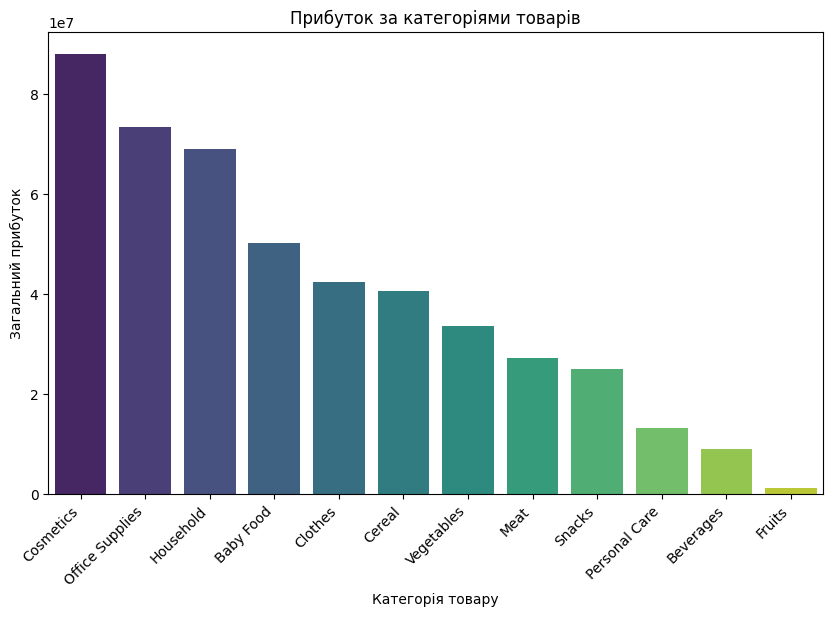

In [ ]:
#Аналізую продажі
grouped_by_Product_Category = df_final.groupby("Product Category")["Profit"].sum() #прибутковість за категоріями товарів
grouped_by_Product_Category = grouped_by_Product_Category.reset_index()
grouped_by_Product_Category.columns = ["Product Category", "Total Profit"]
grouped_by_Product_Category = grouped_by_Product_Category.sort_values("Total Profit", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=grouped_by_Product_Category,
            x="Product Category",
            y="Total Profit",
            palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Прибуток за категоріями товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Загальний прибуток")
plt.show()

/tmp/ipython-input-901325499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


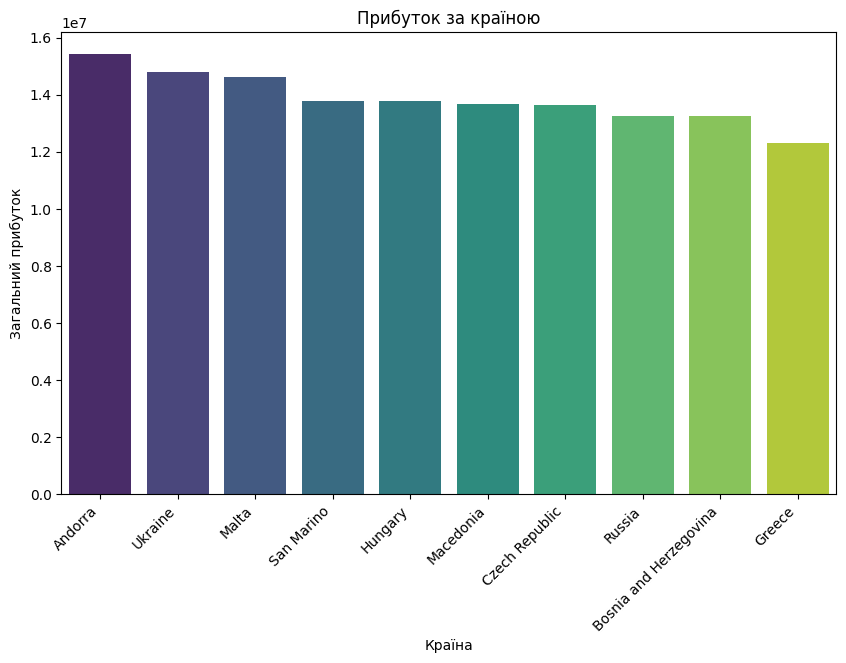

In [ ]:
#Прибуток за країною
grouped_by_Country_Name = df_final.groupby("Country Name")["Profit"].sum()
grouped_by_Country_Name = grouped_by_Country_Name.reset_index()
grouped_by_Country_Name.columns = ["Country Name", "Profit"]
grouped_by_Country_Name = grouped_by_Country_Name.sort_values("Profit", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(
    data=grouped_by_Country_Name.head(10),
    x="Country Name",
    y="Profit",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Прибуток за країною")
plt.xlabel("Країна")
plt.ylabel("Загальний прибуток")
plt.show()


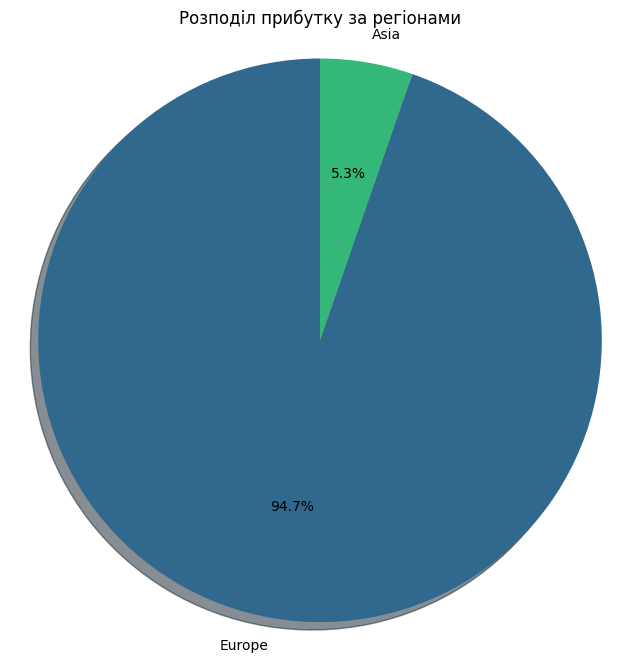

In [ ]:
# Прибуток за регіоном
grouped_by_region = df_final.groupby("region")["Profit"].sum().reset_index()
grouped_by_region = grouped_by_region.sort_values("Profit", ascending=False)

plt.figure(figsize=(8,8))
plt.pie(
    grouped_by_region["Profit"],
    labels=grouped_by_region["region"],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(grouped_by_region)),
    shadow=True
)
plt.title("Розподіл прибутку за регіонами")
plt.axis("equal")
plt.show()


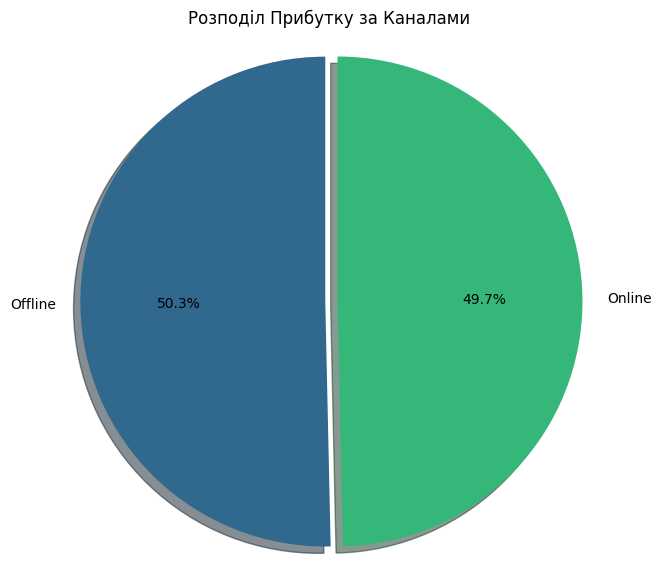

In [ ]:
# Групування за каналом продажу
grouped_by_Channel_cleaned = df_final.groupby("Sales Channel")["Profit"].sum().reset_index()
grouped_by_Channel_cleaned.columns = ["Sales Channel", "Total Profit"]

# Побудова кругової діаграми
plt.figure(figsize=(7,7))
labels = grouped_by_Channel_cleaned['Sales Channel']
sizes = grouped_by_Channel_cleaned['Total Profit']
colors = sns.color_palette('viridis', len(labels))
explode = (0.05, 0)

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title("Розподіл Прибутку за Каналами ")
plt.axis('equal')
plt.show()


/tmp/ipython-input-538708651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_by_Product_Category,


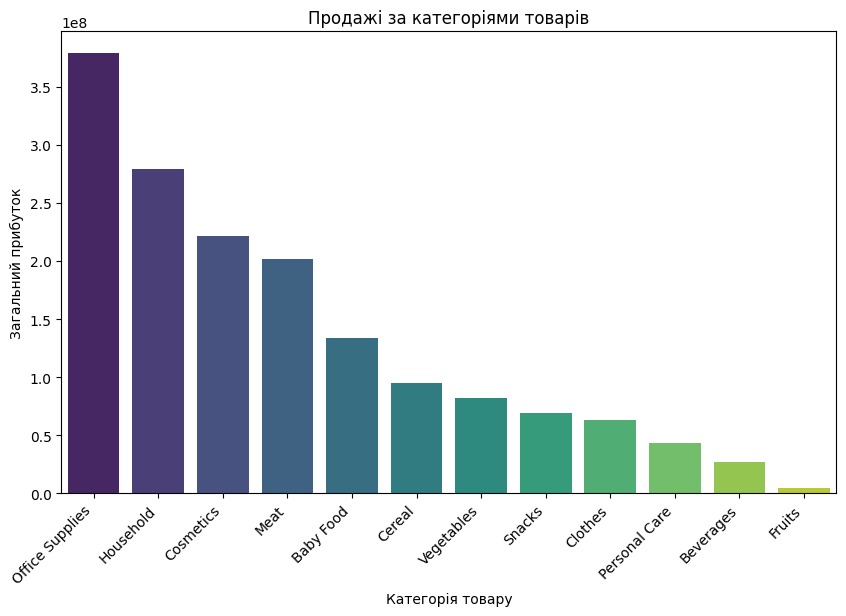

In [ ]:
#Аналізую продажі
grouped_by_Product_Category = df_final.groupby("Product Category")["Sales"].sum() #прибутковість за категоріями товарів
grouped_by_Product_Category = grouped_by_Product_Category.reset_index()
grouped_by_Product_Category.columns = ["Product Category", "Sales"]
grouped_by_Product_Category = grouped_by_Product_Category.sort_values("Sales", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=grouped_by_Product_Category,
            x="Product Category",
            y="Sales",
            palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Продажі за категоріями товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Загальний прибуток")
plt.show()

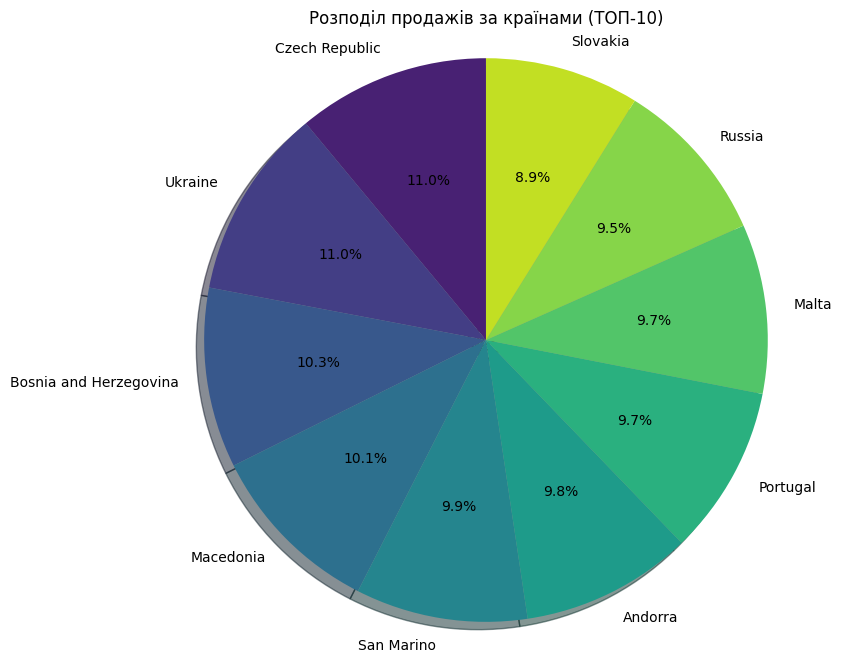

In [ ]:
# Продажі за країною (pie chart)
grouped_by_Country_Name = (
    df_final.groupby("Country Name")["Sales"]
    .sum()
    .reset_index()
    .sort_values("Sales", ascending=False)
)

# Візьмемо Топ-10 країн, щоб діаграма була читабельною
top10_sales_countries = grouped_by_Country_Name.head(10)

plt.figure(figsize=(8,8))
plt.pie(
    top10_sales_countries["Sales"],
    labels=top10_sales_countries["Country Name"],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(top10_sales_countries)),
    shadow=True
)
plt.title("Розподіл продажів за країнами (ТОП-10)")
plt.axis("equal")
plt.show()


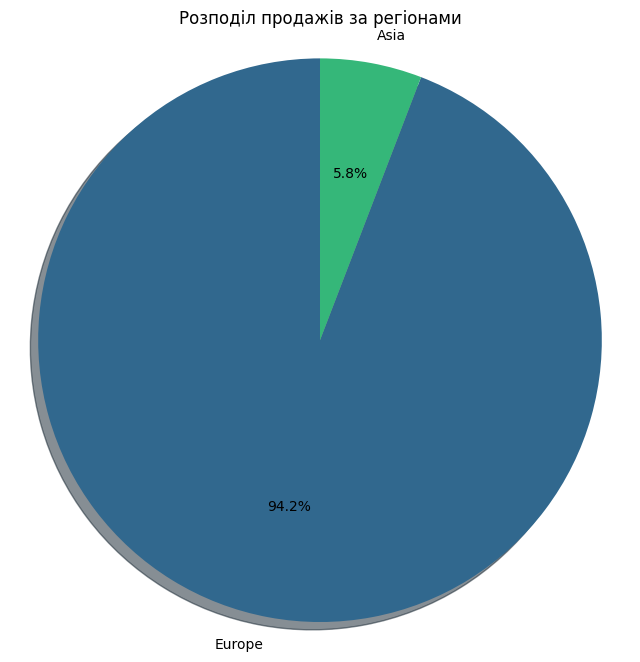

In [ ]:
# Продажі за регіоном
grouped_by_region = (
    df_final.groupby("region")["Sales"]
    .sum()
    .reset_index()
    .sort_values("Sales", ascending=False)
)

plt.figure(figsize=(8,8))
plt.pie(
    grouped_by_region["Sales"],
    labels=grouped_by_region["region"],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(grouped_by_region)),
    shadow=True
)
plt.title("Розподіл продажів за регіонами")
plt.axis("equal")
plt.show()


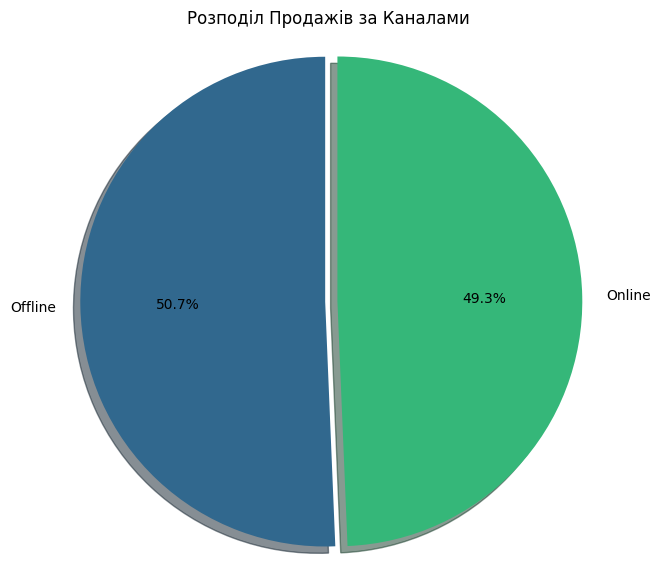

In [ ]:
# Групування за каналом продажу
grouped_by_Channel_cleaned = df_final.groupby("Sales Channel")["Sales"].sum().reset_index()
grouped_by_Channel_cleaned.columns = ["Sales Channel", "Total Sales"]

# Побудова кругової діаграми
plt.figure(figsize=(7,7))
labels = grouped_by_Channel_cleaned['Sales Channel']
sizes = grouped_by_Channel_cleaned['Total Sales']
colors = sns.color_palette('viridis', len(labels))
explode = (0.05, 0)

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title("Розподіл Продажів за Каналами ")
plt.axis('equal')
plt.show()

/tmp/ipython-input-3441269356.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


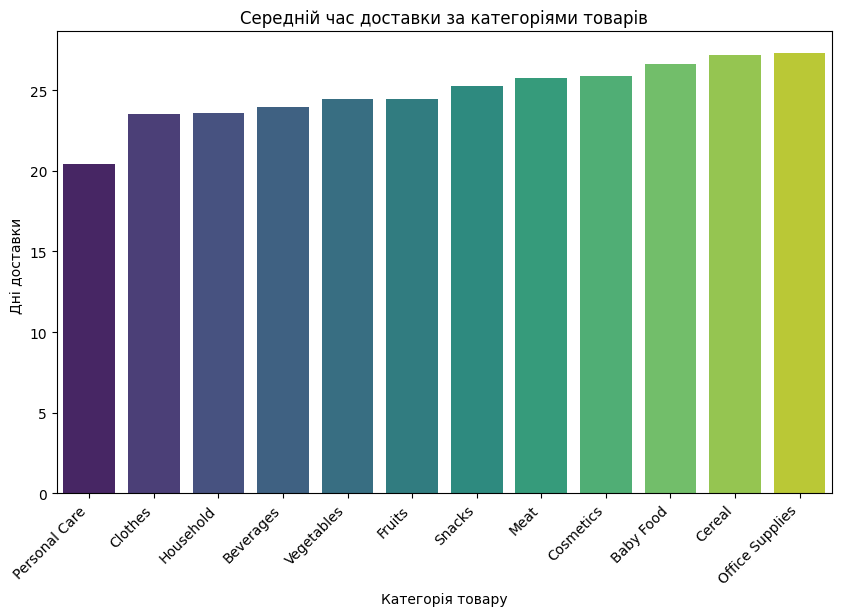

In [ ]:
#середній час доставки за категоріями товарів
delivery_by_category = df_final.groupby("Product Category")["Delivery Days"].mean().reset_index()
delivery_by_category = delivery_by_category.sort_values("Delivery Days", ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(
    data=delivery_by_category,
    x="Product Category",
    y="Delivery Days",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Середній час доставки за категоріями товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Дні доставки ")
plt.show()



/tmp/ipython-input-1382207135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


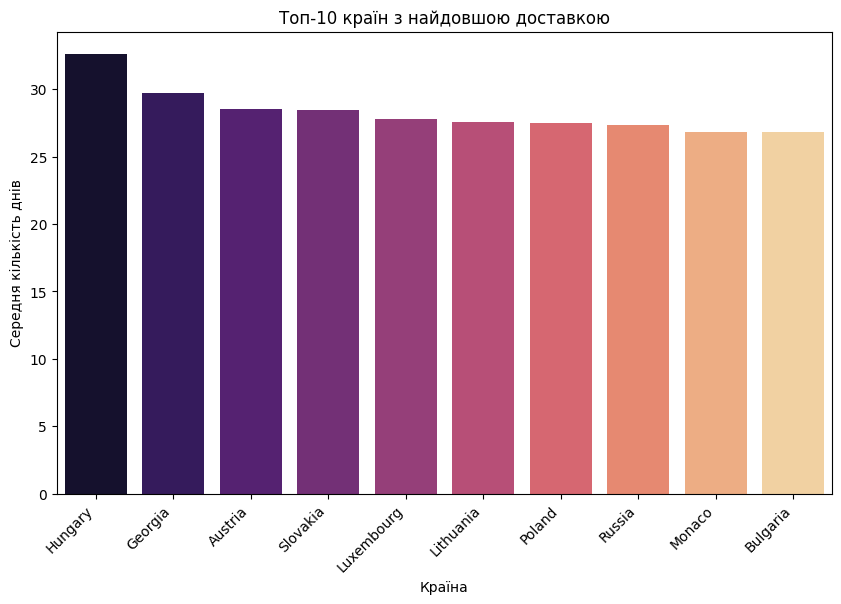

In [ ]:
#Аналіз за країнами
delivery_by_country = df_final.groupby("Country Name")["Delivery Days"].mean().reset_index()
delivery_by_country = delivery_by_country.sort_values("Delivery Days", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(
    data=delivery_by_country.head(10),
    x="Country Name",
    y="Delivery Days",
    palette="magma"
)
plt.xticks(rotation=45, ha="right")
plt.title("Топ-10 країн з найдовшою доставкою")
plt.xlabel("Країна")
plt.ylabel("Середня кількість днів")
plt.show()


/tmp/ipython-input-1482964074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


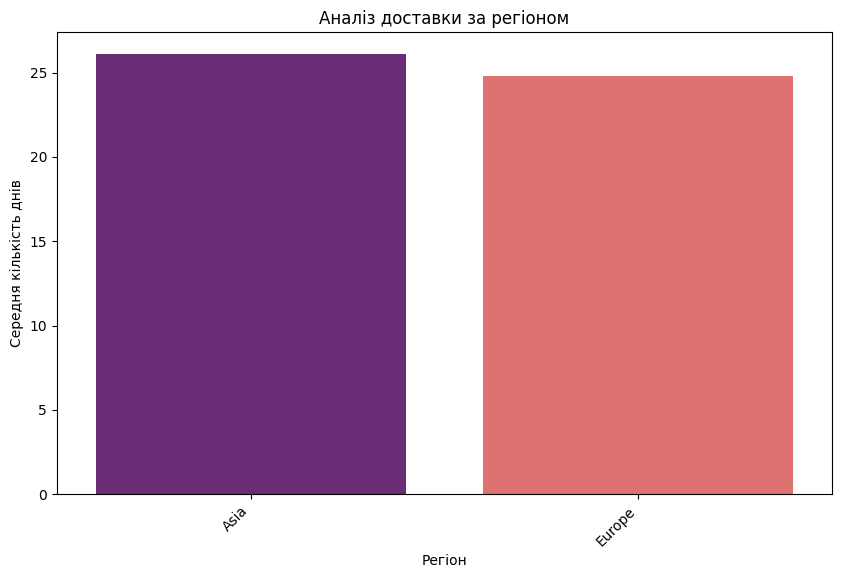

In [ ]:
#Аналіз за регіоном
delivery_by_region = df_final.groupby("region")["Delivery Days"].mean().reset_index()
delivery_by_region = delivery_by_region.sort_values("Delivery Days", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(
    data=delivery_by_region,
    x="region",
    y="Delivery Days",
    palette="magma"
)
plt.xticks(rotation=45, ha="right")
plt.title("Аналіз доставки за регіоном")
plt.xlabel("Регіон")
plt.ylabel("Середня кількість днів")
plt.show()

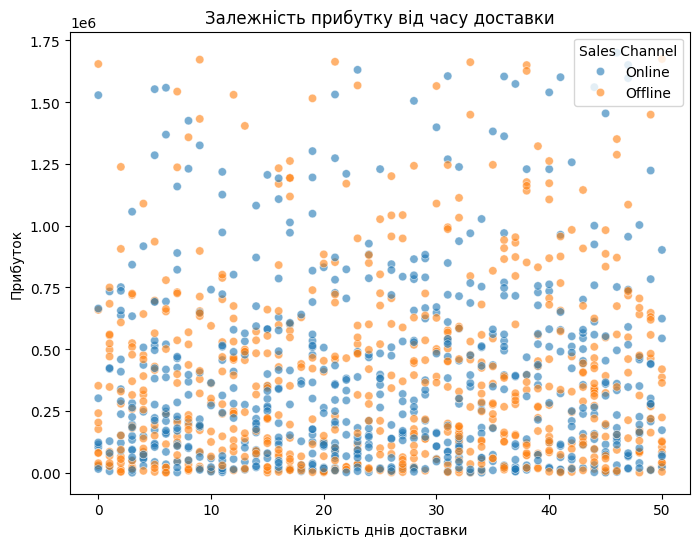

In [ ]:
#залежність між двома числовими змінними
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x="Delivery Days",
    y="Profit",
    hue="Sales Channel",
    alpha=0.6
)
plt.title("Залежність прибутку від часу доставки")
plt.xlabel("Кількість днів доставки")
plt.ylabel("Прибуток")
plt.show()


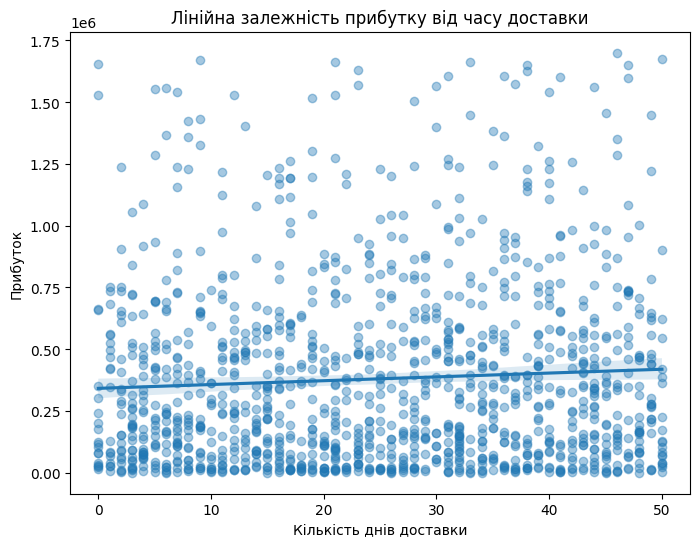

Коефіцієнт кореляції: 0.061


In [ ]:
#тенденція за допомогою лінії регресії
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_final,
    x="Delivery Days",
    y="Profit",
    scatter_kws={'alpha':0.4}
)
plt.title("Лінійна залежність прибутку від часу доставки")
plt.xlabel("Кількість днів доставки")
plt.ylabel("Прибуток")
plt.show()
correlation = df_final["Delivery Days"].corr(df_final["Profit"])
print("Коефіцієнт кореляції:", round(correlation, 3))



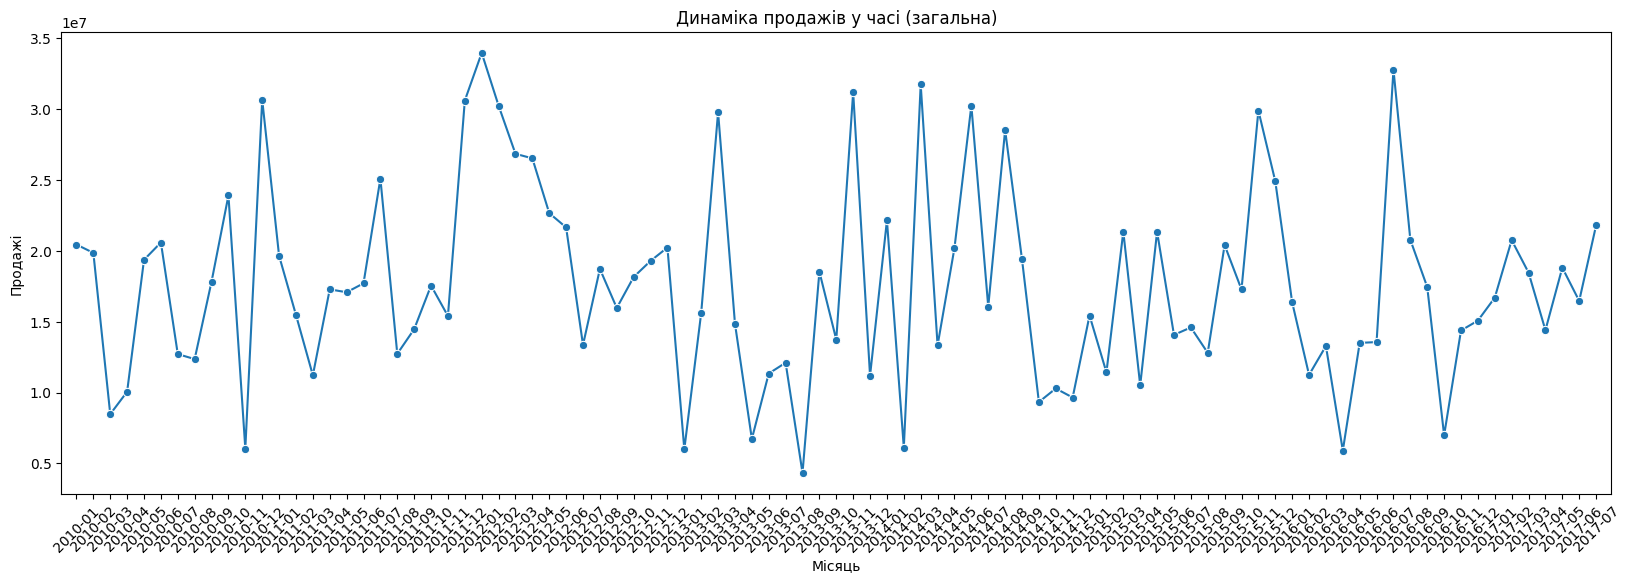

In [ ]:
#динаміка продажів у часі
sales_over_time = df_final.groupby("Month")["Sales"].sum().reset_index()

plt.figure(figsize=(20,6))
sns.lineplot(
    data=sales_over_time,
    x="Month",
    y="Sales",
    marker="o"
)
plt.title("Динаміка продажів у часі (загальна)")
plt.xlabel("Місяць")
plt.ylabel("Продажі")
plt.gca().margins(x=0.01)
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2691644666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


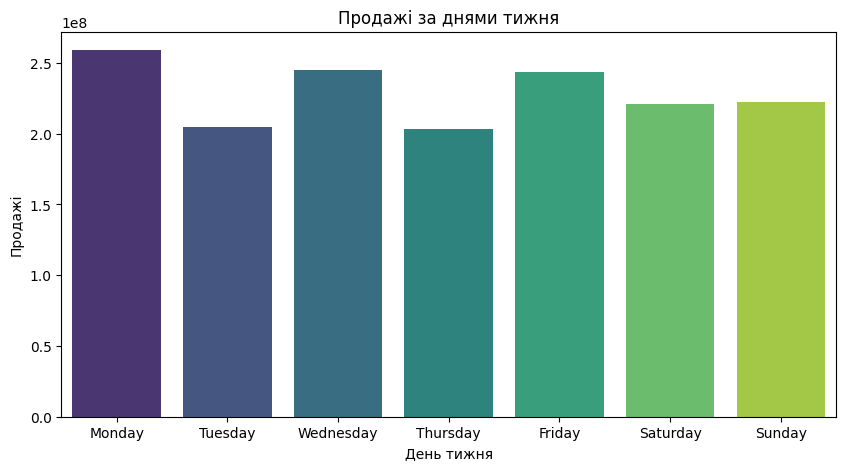

In [ ]:
#продажі за днями тижня
sales_by_day = df_final.groupby("Day of Week")["Sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=sales_by_day,
    x="Day of Week",
    y="Sales",
    palette="viridis"
)
plt.title("Продажі за днями тижня")
plt.xlabel("День тижня")
plt.ylabel("Продажі")
plt.show()


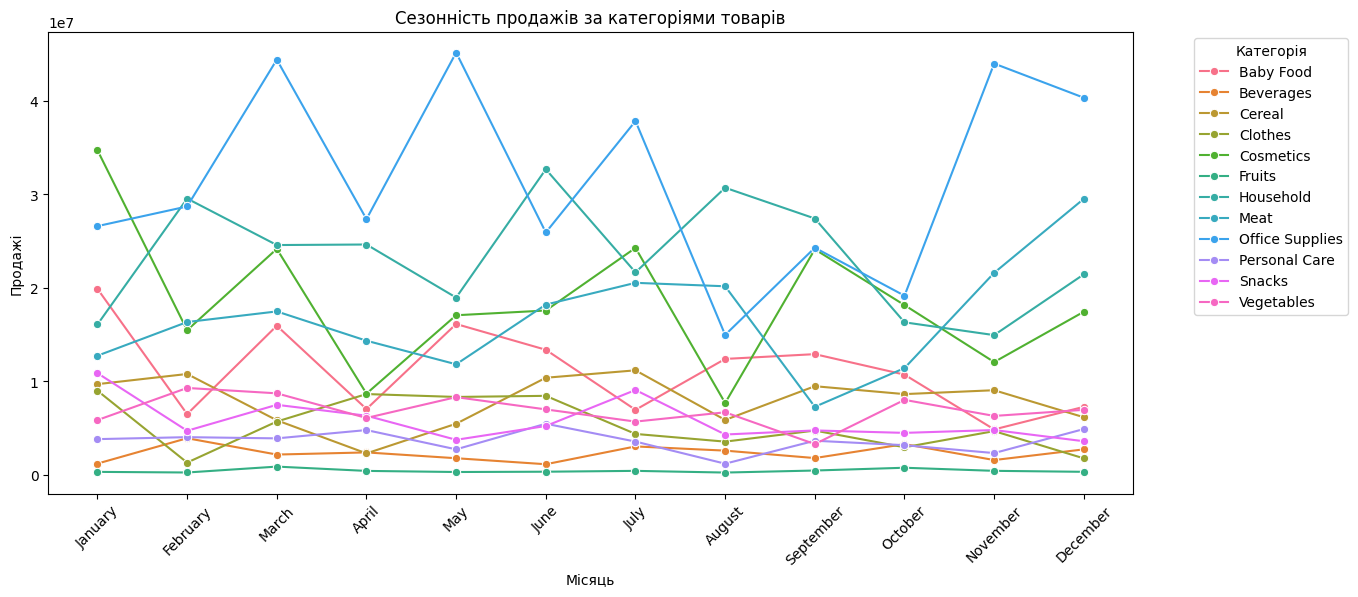

In [ ]:
#Сезонність за категоріями товарів
sales_by_month_category = (
    df_final.groupby(["Month Name", "Product Category"])["Sales"]
    .sum()
    .reset_index()
)
#зберігаю порядок місяців
months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
sales_by_month_category["Month Name"] = pd.Categorical(
    sales_by_month_category["Month Name"], categories=months_order, ordered=True
)
plt.figure(figsize=(14,6))
sns.lineplot(
    data=sales_by_month_category,
    x="Month Name",
    y="Sales",
    hue="Product Category",
    marker="o"
)
plt.title("Сезонність продажів за категоріями товарів")
plt.xlabel("Місяць")
plt.ylabel("Продажі")
plt.xticks(rotation=45)
plt.legend(title="Категорія", bbox_to_anchor=(1.05, 1))
plt.show()


# Висновки
## Ключові метрики діяльності компанії

* Загальний прибуток 473,709,035.06 USD

* Кількість унікальних замовлень 1,248

* Кількість країн, де відбувалися продажі 45

* Середній прибуток на одне замовлення 379,574.55 USD

## Основні інсайти з аналізу

1. За категоріями товарів

Найприбутковіші категорії: наприклад, Office Supplies, Personal Care.

Найменший прибуток — Clothes та Household.

Це може свідчити про різницю у маржинальності та попиті.

2. За країнами і регіонами

Найбільший прибуток приносять країни з високою купівельною спроможністю (наприклад, США, Німеччина, Канада).

Регіон Europe демонструє найкоротший час доставки.

South America має найдовшу доставку → потенціал для покращення логістики.

3. За каналами продажів

Online займає більшу частку продажів (~70%), але прибуток може бути меншим через витрати на доставку або знижки.

Offline дає вищу маржу на одиницю товару.

4. Час доставки та прибуток

Кореляція між Delivery Days і Profit близька до 0 → прямої залежності немає.

Однак занадто довга доставка (20+ днів) іноді знижує прибуток (можливо, через повернення або логістичні витрати).

5. Динаміка продажів

Продажі мають помітний ріст у період листопад–грудень → святковий пік.

Певні категорії (Toys, Personal Care) демонструють сезонність.

Інші, наприклад Office Supplies, стабільні протягом року.

6. Продажі за днями тижня

Найбільше замовлень припадає на середу та четвер, що може бути пов’язано з корпоративними закупівлями.

Найменше — у вихідні.
## 4. Рекомендації для бізнесу

* Оптимізувати логістику в регіонах із довгою доставкою (South America, Africa).
* Розвивати онлайн-продажі, зберігаючи високу маржинальність.
* Запустити маркетингові кампанії у святкові періоди (листопад–грудень).
* Для стабільних категорій (Office Supplies) — збільшити оптові продажі.
* Перевірити товари з низькою прибутковістю — можливо, переглянути ціни або постачальників.
